In [3]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X_train = [[1, 2], [2, 3], [3, 1], [6, 7], [7, 8], [8, 6]]
y_train = ['A', 'A', 'A', 'B', 'B', 'B']

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

X_test = [[4, 5], [9, 10]]

y_pred = knn.predict(X_test)

print(y_pred)

['A' 'B']


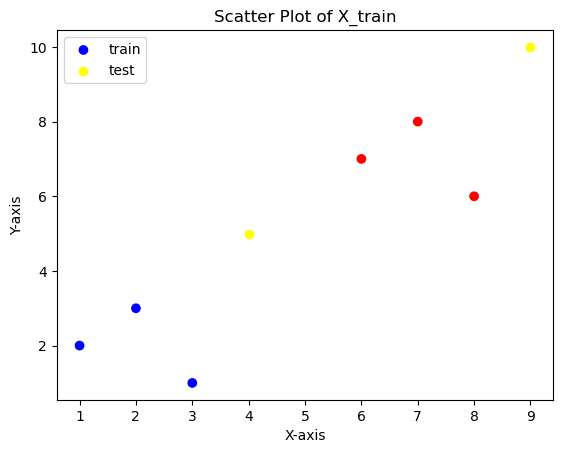

In [12]:
# 将'A'对应的点绘制为蓝色，'B'对应的点绘制为红色
colors = {'A': 'blue', 'B': 'red'}
color_list = [colors[label] for label in y_train]

# 获取X_train中的x和y坐标
x_values = [x[0] for x in X_train]
y_values = [x[1] for x in X_train]

# 绘制散点图
plt.scatter(x_values, y_values, c=color_list, label='train')
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c='yellow', label='test')
# 添加标题和坐标轴标签
plt.title('Scatter Plot of X_train')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
# 显示图形
plt.show()

Accuracy: 0.9333333333333333


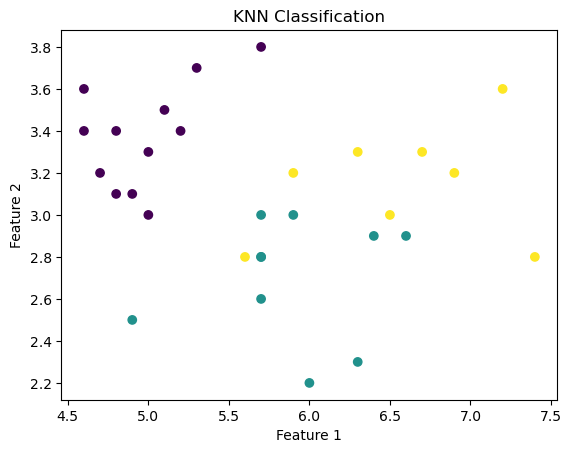

In [13]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 加载数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 创建 KNN 分类器实例
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# 训练模型
knn.fit(X_train, y_train)
# 进行预测
y_pred = knn.predict(X_test)

# 评估模型
print("Accuracy:", accuracy_score(y_test, y_pred))

# 可视化
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)  # 仅取前两个特征进行可视化
plt.title("KNN Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

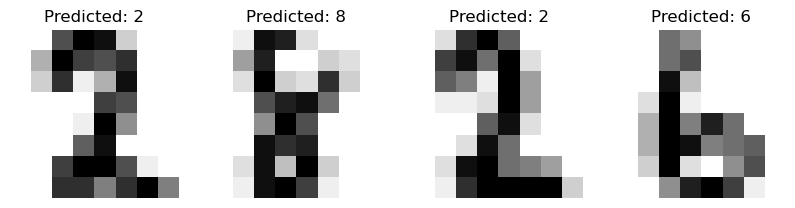

In [14]:
# 手写数字集
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# 加载数据集
digits = datasets.load_digits()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

# 创建 KNN 分类器
knn = KNeighborsClassifier(n_neighbors=3)

# 训练模型
knn.fit(X_train, y_train)

# 进行预测
y_pred = knn.predict(X_test)

# 显示几个测试图像及其预测结果
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Predicted: {prediction}')
plt.show()

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.91      0.78       163
           1       0.60      0.82      0.69       190
           2       0.63      0.73      0.68       200
           3       0.65      0.71      0.68       196
           4       0.73      0.71      0.72       201
           5       0.83      0.72      0.77       198
           6       0.78      0.58      0.66       206
           7       0.85      0.86      0.86       177
           8       0.89      0.80      0.84       189
           9       0.83      0.88      0.85       171
          10       0.90      0.92      0.91       233
          11       0.81      0.92      0.86       190
          12       0.85      0.70      0.77       207
          13       0.92      0.81      0.86       203
          14       0.91      0.90      0.90       191
          15       0.87      0.77      0.82       198
          16       0.90      0.85      0.87       155
   

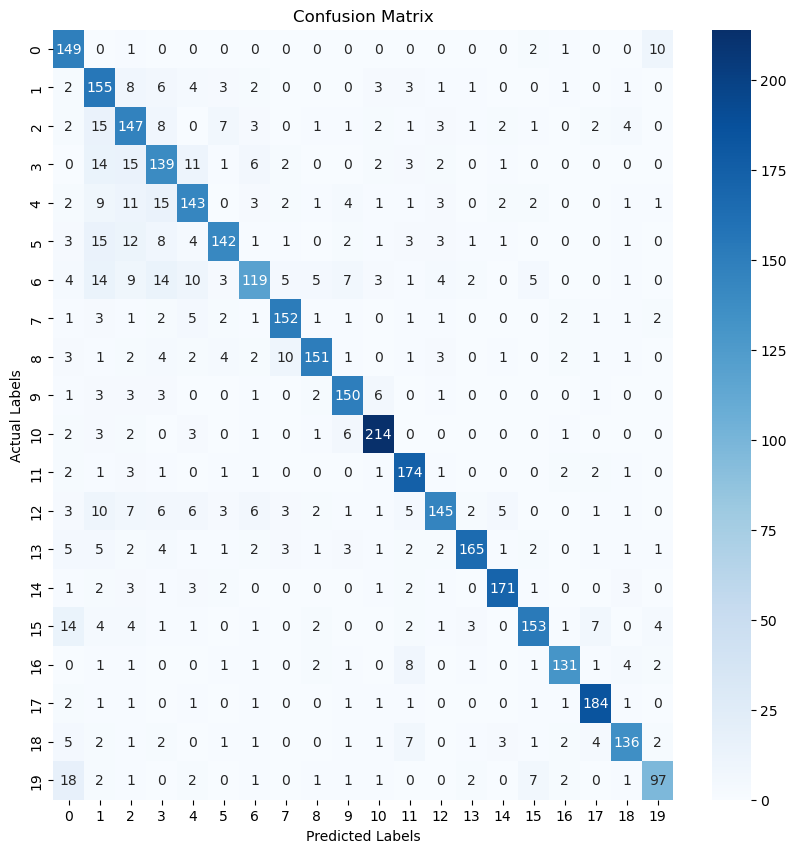

In [15]:
# 文本分类
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 加载数据集
newsgroups = fetch_20newsgroups(subset='all')
X, y = newsgroups.data, newsgroups.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 创建一个 TfidfVectorizer 和 KNN 的 pipeline
knn_pipeline = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=3))

# 训练模型
knn_pipeline.fit(X_train, y_train)

# 进行预测
y_pred = knn_pipeline.predict(X_test)

# 评估模型
print("Classification report:\n", classification_report(y_test, y_pred))

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()